In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./combinedData.csv',index_col=None, header=0,sep=',')

In [21]:
df = df.drop(['STATION'],axis=1)

In [22]:
df.head()

,DATE,DAY,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,...,9 pm,10 pm,11 pm,12 mid,TOTAL,Station number,Estimated,Direction,COUNTY,RETIRED
0,2002-01-01,Tuesday,3,12,4,4,4,3,1,3,...,8,10,16,5,200,8,False,East,Norman,False
1,2002-01-02,Wednesday,2,0,0,1,0,3,7,14,...,13,10,0,6,320,8,False,East,Norman,False
2,2002-01-03,Thursday,2,0,2,0,2,4,6,50,...,13,20,3,0,422,8,False,East,Norman,False
3,2002-01-04,Friday,4,1,1,0,0,3,5,39,...,25,49,25,28,646,8,False,East,Norman,False
4,2002-01-05,Saturday,6,7,3,1,0,2,11,8,...,16,8,14,8,297,8,False,East,Norman,False


In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [27]:
df.head()

,DATE,DAY,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,...,9 pm,10 pm,11 pm,12 mid,TOTAL,Station number,Estimated,Direction,COUNTY,RETIRED
0,2002-01-01,Tuesday,3,12,4,4,4,3,1,3,...,8,10,16,5,200,8,False,East,Norman,False
1,2002-01-02,Wednesday,2,0,0,1,0,3,7,14,...,13,10,0,6,320,8,False,East,Norman,False
2,2002-01-03,Thursday,2,0,2,0,2,4,6,50,...,13,20,3,0,422,8,False,East,Norman,False
3,2002-01-04,Friday,4,1,1,0,0,3,5,39,...,25,49,25,28,646,8,False,East,Norman,False
4,2002-01-05,Saturday,6,7,3,1,0,2,11,8,...,16,8,14,8,297,8,False,East,Norman,False


In [65]:
df['Hourly avg']=df[df.columns[2:26]].mean(axis=1)

In [66]:
df.head()

,DATE,DAY,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,...,10 pm,11 pm,12 mid,TOTAL,Station number,Estimated,Direction,COUNTY,RETIRED,Hourly avg
0,2002-01-01,Tuesday,3,12,4,4,4,3,1,3,...,10,16,5,200,8,False,East,Norman,False,8.333333
1,2002-01-02,Wednesday,2,0,0,1,0,3,7,14,...,10,0,6,320,8,False,East,Norman,False,13.333333
2,2002-01-03,Thursday,2,0,2,0,2,4,6,50,...,20,3,0,422,8,False,East,Norman,False,17.583333
3,2002-01-04,Friday,4,1,1,0,0,3,5,39,...,49,25,28,646,8,False,East,Norman,False,26.916667
4,2002-01-05,Saturday,6,7,3,1,0,2,11,8,...,8,14,8,297,8,False,East,Norman,False,12.375000


In [67]:
gp = df.groupby(['Station number','Direction'])

In [73]:
#Confirmed this to be correct numbers with station 8 testing in excel
avgs = gp.mean().drop(['Estimated', 'RETIRED'],axis=1)
avgs

1 am        2 am        3 am        4 am  \
Station number Direction                                                   
8              East         1.640993    1.237817    0.700128    0.459573   
               North        1.785714    1.107143    0.821429    0.500000   
               South        1.071429    0.714286    0.357143    0.500000   
               West         1.291477    0.839022    0.599927    0.432196   
26             North      111.533251   88.068358   83.696876   87.356944   
               South       98.851222   75.302815   67.958243   66.444788   
27             East        20.355677   15.470588   15.775650   16.176471   
               West        30.083447   21.035568   15.701778   17.551300   
28             East        41.312660   24.957556   19.603366   11.536041   
               North       37.000000   22.000000   17.307692    8.615385   
               South       29.384615   17.923077   14.230769    9.230769   
               West        34.319429   24.349982   19.947311   12.836626   
29             North       35.531449   23.854452   19.960194   17.958067   
               South       16.085688   11.031601   11.728350   12.880583   
30             North       29.120833   17.575000   14.104167   14.312500   
               South       15.395833   10.037500    8.050000   13.379167   
31             East        21.599907   13.663737   13.665125   11.000463   
               West        17.467160   10.863552   14.509251   11.681776   
32             North       85.445585   58.757700   47.511294   58.130732   
               South      142.885010   87.716632   61.914442   68.350445   
33             East        15.271732   10.922998   12.336071   11.869952   
               West        19.295688   12.544490   11.976386   10.168720   
34             North       13.227242    9.655715    8.198494    6.898700   
               South        9.942505    7.392882    7.414100    7.344285   
35             East        17.676978   15.432795   11.601697   16.667123   
               West        19.032576   11.592390    8.916781    8.151382   
36             East       140.488462   78.791259   63.053147   55.264336   
               West       120.150350   78.709441   77.857692   68.993007   
38             North      106.971451   78.427063   84.264372   64.377004   
               South      133.302307   84.506062   83.056707   74.855690   
...                              ...         ...         ...         ...   
386            North       28.518890   16.188721   10.015696    7.641905   
               South       15.394233    9.956744    9.174484   14.926081   
388            North       93.275415   54.003103   35.925169   28.459573   
               South       43.308998   32.870597   30.473262   57.770031   
389            North      230.514145  143.275780  114.300420   89.954919   
               South      155.622559  104.817667   89.792115  105.718014   
390            North       34.055984   19.584068   13.856828   10.955764   
               South       21.212372   13.682819    9.379956   11.604075   
400            North        5.080124    2.940683    1.926994    1.716189   
               South        5.116262    3.011863    2.279431    2.906370   
402            North       30.461946   17.244388   10.640445    9.254243   
               South       41.357364   20.724767   13.203504    9.304435   
405            North      505.032853  347.444607  257.189451  212.872604   
               South      402.628217  281.335098  222.690272  200.070086   
407            East        47.596642   27.119182   16.384377   20.280161   
               West        81.483847   43.955649   27.561599   18.812922   
410            North        7.167549    4.633875    3.984121    4.631685   
               South       12.776784    8.104581    5.179595    3.100931   
420            East       138.300055   88.540427   67.676766   47.856178   
               West       104.847782   69.268297   49.581493   46.936667   
422 

In [100]:
st8 = avgs.loc[8]
st8

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL,Hourly avg
Direction,,,,,,,,,,,,,,,,,,,,,
East,1.640993,1.237817,0.700128,0.459573,0.403541,1.732980,4.117905,13.843767,15.052747,14.661982,...,21.426355,22.715094,18.309181,12.589524,9.946341,7.866216,4.744296,2.595729,252.708158,10.530693
North,1.785714,1.107143,0.821429,0.500000,0.321429,1.750000,2.642857,5.821429,10.107143,11.678571,...,15.678571,14.892857,12.250000,7.535714,7.464286,7.321429,5.285714,3.428571,194.142857,8.089286
South,1.071429,0.714286,0.357143,0.500000,0.535714,2.607143,3.750000,8.892857,7.892857,10.321429,...,11.607143,10.321429,8.321429,6.964286,6.535714,6.035714,3.714286,1.678571,164.392857,6.849702
West,1.291477,0.839022,0.599927,0.432196,0.475817,2.315204,5.013689,13.081949,11.620186,12.268297,...,17.198211,17.196204,13.776967,10.993612,10.384559,8.670013,4.311006,2.231794,227.891769,9.500053


In [102]:
st8East = st8.loc['East',:'12 mid']

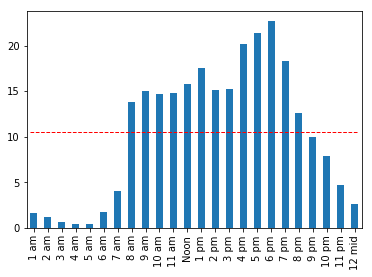

In [124]:
ax = st8East.plot.bar()

x = [ax.patches[0].get_x(), ax.patches[-1].get_x() + ax.patches[-1].get_width()]
y = [st8.loc['East']['Hourly avg']] * 2

plt.plot(x, y, 'r--', c='r', linewidth=1)
plt.show()

In [138]:
def plotHours(station, direction, df):
    st = df.loc[station]
    stDir = st.loc[direction,:'12 mid']
    ax = stDir.plot.bar()

    x = [ax.patches[0].get_x(), ax.patches[-1].get_x() + ax.patches[-1].get_width()]
    y = [st.loc[direction]['Hourly avg']] * 2

    plt.plot(x, y, 'r--', c='r', linewidth=1)
    plt.xlabel("Times")
    plt.ylabel("Average number of cars")
    plt.title("Station "+str(station) +", " + direction)
    plt.show()

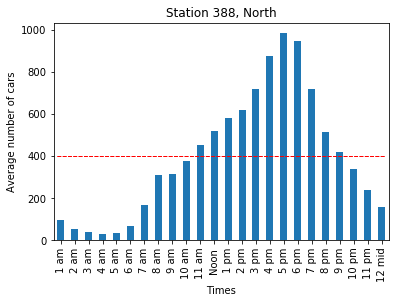

In [139]:
plotHours(388,'North',avgs)